In [1]:
import torch
import numpy

import h5py
import matplotlib.pyplot as plt

/home/home02/scoc/.conda/envs/le_pde/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
(tsamples-input_time_stamps)%output_time_stamps  == 0

False

In [29]:
tsamples = 140/4
input_time_stamps = 1
output_time_stamps = 4
int((tsamples-input_time_stamps)/output_time_stamps) + 1


9

In [6]:
time_indicies = tsamples

In [16]:
time_stamps = [i for i in range(0, int(time_indicies)+output_time_stamps, output_time_stamps)]

In [17]:
time_stamps

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36]

In [15]:
time_stamps[8+1]

IndexError: list index out of range

In [12]:
for t in range(9):
    print(input_time_stamps+time_stamps[t],input_time_stamps+time_stamps[t+1])

1 5
5 9
9 13
13 17
17 21
21 25
25 29
29 33


IndexError: list index out of range

In [19]:
xx = [6,7,8]
xx[1:10]

[7, 8]

In [9]:
dataset_test_path = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/data/KS_train_576.h5"
dataset_test_path1 = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/data1/KS_train_576.h5"
dataset_test_path_3 = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/data_3/KS_train_576.h5"

dataset_test_path_test = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/KS_test_long.h5"
dataset_test_path_valid = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/KS_valid_long.h5"

dataset_test_path_1 = "/nobackup/scoc/variable_autoregression/data/KS_train_128.h5"
dataset_test_path1_1 = "/nobackup/scoc/variable_autoregression/data_2/KS_train_128.h5"
dataset_test_path_3_1 = "/nobackup/scoc/variable_autoregression/data_3/KS_train_128.h5"

In [10]:
hdf5_test_file = h5py.File(dataset_test_path, 'r')
hdf5_test_file1 = h5py.File(dataset_test_path1, 'r')
hdf5_test_file_3 = h5py.File(dataset_test_path_3, 'r')
hdf5_test_file_test = h5py.File(dataset_test_path_test, 'r')
hdf5_test_file_valid = h5py.File(dataset_test_path_valid, 'r')
hdf5_test_file_1 = h5py.File(dataset_test_path_1, 'r')
hdf5_test_file1_1 = h5py.File(dataset_test_path1_1, 'r')
hdf5_test_file_3_1 = h5py.File(dataset_test_path_3_1, 'r')

In [11]:
print(hdf5_test_file['train']['pde_640-256'][:].shape)
print(hdf5_test_file1['train']['pde_640-256'][:].shape)
print(hdf5_test_file_3['train']['pde_640-256'][:].shape)
print(hdf5_test_file_test['test']['pde_640-256'][:].shape)
print(hdf5_test_file_valid['valid']['pde_640-256'][:].shape)
print(hdf5_test_file_1['train']['pde_640-256'][:].shape)
print(hdf5_test_file1_1['train']['pde_640-256'][:].shape)
print(hdf5_test_file_3_1['train']['pde_640-256'][:].shape)

(576, 640, 256)
(576, 640, 256)
(576, 640, 256)
(128, 640, 256)
(128, 640, 256)
(128, 640, 256)
(128, 640, 256)
(128, 640, 256)


In [12]:
(576*3)+(128*5)

2368

In [13]:
hdf5_test_file['train'].keys()

<KeysViewHDF5 ['dt', 'dx', 'pde_640-256', 't', 'x']>

In [14]:
train_data_dt = numpy.concatenate((
    hdf5_test_file['train']['dt'][:],
    hdf5_test_file1['train']['dt'][:],
    hdf5_test_file_3['train']['dt'][:],
    hdf5_test_file_test['test']['dt'][:],
    hdf5_test_file_valid['valid']['dt'][:],
    hdf5_test_file_1['train']['dt'][:],
    hdf5_test_file1_1['train']['dt'][:],
    hdf5_test_file_3_1['train']['dt'][:],
), axis = 0)

In [15]:
train_data_dx = numpy.concatenate((
    hdf5_test_file['train']['dx'][:],
    hdf5_test_file1['train']['dx'][:],
    hdf5_test_file_3['train']['dx'][:],
    hdf5_test_file_test['test']['dx'][:],
    hdf5_test_file_valid['valid']['dx'][:],
    hdf5_test_file_1['train']['dx'][:],
    hdf5_test_file1_1['train']['dx'][:],
    hdf5_test_file_3_1['train']['dx'][:],
), axis = 0)

In [21]:
train_data_u.shape

(2368, 640, 256)

In [16]:
train_data_u = numpy.concatenate((
    hdf5_test_file['train']['pde_640-256'][:],
    hdf5_test_file1['train']['pde_640-256'][:],
    hdf5_test_file_3['train']['pde_640-256'][:],
    hdf5_test_file_test['test']['pde_640-256'][:],
    hdf5_test_file_valid['valid']['pde_640-256'][:],
    hdf5_test_file_1['train']['pde_640-256'][:],
    hdf5_test_file1_1['train']['pde_640-256'][:],
    hdf5_test_file_3_1['train']['pde_640-256'][:],
), axis = 0)

In [17]:
train_data_t = numpy.concatenate((
    hdf5_test_file['train']['t'][:],
    hdf5_test_file1['train']['t'][:],
    hdf5_test_file_3['train']['t'][:],
    hdf5_test_file_test['test']['t'][:],
    hdf5_test_file_valid['valid']['t'][:],
    hdf5_test_file_1['train']['t'][:],
    hdf5_test_file1_1['train']['t'][:],
    hdf5_test_file_3_1['train']['t'][:],
), axis = 0)

In [18]:
train_data_x = numpy.concatenate((
    hdf5_test_file['train']['x'][:],
    hdf5_test_file1['train']['x'][:],
    hdf5_test_file_3['train']['x'][:],
    hdf5_test_file_test['test']['x'][:],
    hdf5_test_file_valid['valid']['x'][:],
    hdf5_test_file_1['train']['x'][:],
    hdf5_test_file1_1['train']['x'][:],
    hdf5_test_file_3_1['train']['x'][:],
), axis = 0)

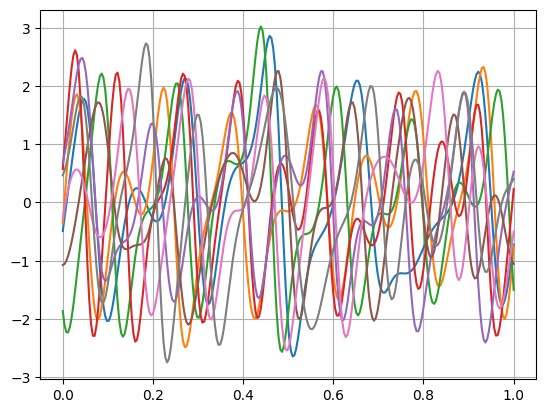

In [19]:
plt.plot(torch.linspace(0,1,256),hdf5_test_file['train']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file1['train']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file_3['train']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file_test['test']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file_valid['valid']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file_1['train']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file1_1['train']['pde_640-256'][:][0,0] )
plt.plot(torch.linspace(0,1,256),hdf5_test_file_3_1['train']['pde_640-256'][:][0,0] )
plt.grid()

In [23]:
hdf5_test_file['train'].keys()

<KeysViewHDF5 ['dt', 'dx', 'pde_640-256', 't', 'x']>

In [20]:
xx = hdf5_test_file_test["test"]["dt"][:]
print(max(xx))
print(min(xx))

0.2199600652922362
0.18098907714127457


In [33]:
h5f = h5py.File("".join(["KS1_test", '.h5']), 'a')
mode = "test"
dataset = h5f.create_group(mode)

In [23]:
2368-2048

320

In [ ]:
num_samples = 2048

In [22]:
train_data_u.shape

(2368, 640, 256)

In [27]:
nx

256

In [34]:
num_samples, nt_effective, nx = 320, train_data_u.shape[1],  train_data_u.shape[2]



In [35]:
h5f_u = dataset.create_dataset(f'pde_640-256', (num_samples, nt_effective, nx), dtype=float)
xcoord = dataset.create_dataset(f'x', (num_samples, nx), dtype=float)
dx = dataset.create_dataset(f'dx', (num_samples,), dtype=float)
tcoord = dataset.create_dataset(f't', (num_samples, nt_effective), dtype=float)
dt = dataset.create_dataset(f'dt', (num_samples,), dtype=float)


In [36]:
h5f_u[:] = train_data_u[-num_samples:]
xcoord[:] = train_data_x[-num_samples:]
dx[:] = train_data_dx[-num_samples:]
tcoord[:] = train_data_t[-num_samples:]
dt[:] = train_data_dt[-num_samples:]


In [37]:
h5f.close()

In [62]:
dataset["train"].keys()

KeyError: "Unable to open object (object 'train' doesn't exist)"

In [ ]:
#hdf5_train_file = h5py.File(args.dataset_train_path, 'r')
hdf5_test_file = h5py.File(dataset_test_path, 'r')
#hdf5_valid_file = h5py.File(args.dataset_valid_path, 'r')

#train_loaded_data = hdf5_train_file['train']['pde_250-100'][:]
test_loaded_data = hdf5_test_file['train']['pde_640-256'][:]
#valid_loaded_data = hdf5_valid_file['valid']['pde_250-100'][:]

#train_tensor =  train_loaded_data.squeeze()
#train_data = torch.from_numpy(train_tensor).float()

test_tensor =  test_loaded_data.squeeze()
test_data = torch.from_numpy(test_tensor).float()

#valid_tensor =  valid_loaded_data.squeeze()
#valid_data = torch.from_numpy(valid_tensor).float()


#x_train = train_data[:argsn_train,...].permute(0,2,1)
x_test = test_data.permute(0,2,1)
#x_valid = valid_data[:args.n_test,...].permute(0,2,1)

In [19]:
test_file = h5py.File("/nobackup/scoc/variable_autoregression/dataset/data/KS1_old/KS_train_2048.h5", 'r')
test_file_1 = h5py.File("/nobackup/scoc/variable_autoregression/dataset/data/KS1_old/KS_test.h5", 'r')

In [29]:
test_file["train"].keys()

<KeysViewHDF5 ['dt', 'dx', 'pde_140-256', 't', 'x']>

In [25]:
test_file["train"]["pde_140-256"].shape

(2048, 140, 256)

In [26]:
numpy.round(test_file["train"]["dt"][:], 3)

array([0.379, 0.393, 0.394, ..., 0.441, 0.439, 0.426])

In [28]:
min(test_file["train"]["dt"][:])

0.36147724336863596

In [23]:
numpy.round(test_file_1["test"]["dt"][:], 3)

array([0.431, 0.381, 0.4  , 0.394, 0.4  , 0.38 , 0.388, 0.416, 0.434,
       0.401, 0.376, 0.409, 0.406, 0.422, 0.393, 0.383, 0.408, 0.419,
       0.367, 0.393, 0.424, 0.4  , 0.416, 0.42 , 0.374, 0.392, 0.395,
       0.44 , 0.407, 0.386, 0.427, 0.431, 0.402, 0.43 , 0.399, 0.363,
       0.409, 0.388, 0.393, 0.412, 0.403, 0.407, 0.378, 0.437, 0.422,
       0.377, 0.393, 0.383, 0.375, 0.422, 0.388, 0.413, 0.426, 0.435,
       0.368, 0.435, 0.438, 0.438, 0.44 , 0.363, 0.431, 0.364, 0.425,
       0.368, 0.421, 0.407, 0.438, 0.424, 0.419, 0.383, 0.392, 0.408,
       0.412, 0.422, 0.425, 0.421, 0.438, 0.413, 0.41 , 0.4  , 0.379,
       0.383, 0.389, 0.434, 0.44 , 0.369, 0.387, 0.426, 0.433, 0.372,
       0.434, 0.389, 0.365, 0.41 , 0.364, 0.417, 0.407, 0.393, 0.388,
       0.391, 0.409, 0.432, 0.367, 0.4  , 0.433, 0.367, 0.391, 0.435,
       0.423, 0.438, 0.44 , 0.364, 0.43 , 0.431, 0.401, 0.432, 0.393,
       0.418, 0.425, 0.378, 0.394, 0.407, 0.394, 0.399, 0.378, 0.406,
       0.401, 0.409]

In [5]:
torch.diff(torch.from_numpy(test_file["train"]["t"][:]))[:,0]

tensor([0.1810, 0.2184, 0.1841,  ..., 0.1809, 0.1921, 0.1969],
       dtype=torch.float64)

In [15]:
x = torch.rand(5,4,3)

In [18]:
torch.max(x)

tensor(0.9891)

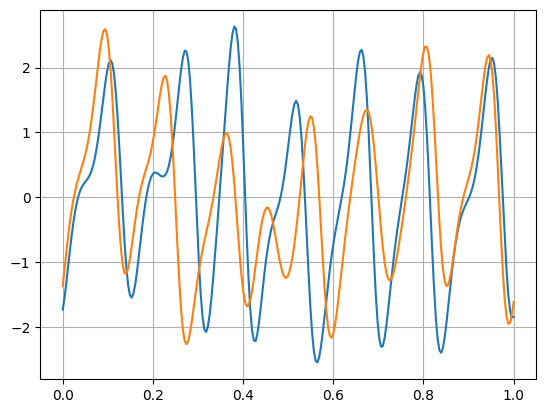

In [43]:
# plt.plot(torch.linspace(0,1,256),test_file['train']['pde_640-256'][:][2,0] )
# plt.plot(torch.linspace(0,1,256),test_file_1['test']['pde_640-256'][:][2,0] )
# plt.plot(torch.linspace(0,1,256),hdf5_test_file_3['train']['pde_640-256'][:][0,0] )
# plt.plot(torch.linspace(0,1,256),hdf5_test_file_test['test']['pde_640-256'][:][0,0] )
# plt.plot(torch.linspace(0,1,256),hdf5_test_file_valid['valid']['pde_640-256'][:][0,0] )
# plt.plot(torch.linspace(0,1,256),hdf5_test_file_1['train']['pde_640-256'][:][0,0] )
# plt.plot(torch.linspace(0,1,256),hdf5_test_file1_1['train']['pde_640-256'][:][0,0] )
# plt.plot(torch.linspace(0,1,256),hdf5_test_file_3_1['train']['pde_640-256'][:][0,0] )
plt.grid()

In [89]:
test_file["train"]["pde_640-256"][:][0]

array([[-0.4914736 , -0.26023209, -0.02984549, ..., -1.1702561 ,
        -0.95068715, -0.72259247],
       [-0.52415351, -0.28062239, -0.03759085, ..., -1.23173346,
        -1.00462763, -0.76667348],
       [-0.55661858, -0.30154326, -0.04656403, ..., -1.29056229,
        -1.05675161, -0.80975413],
       ...,
       [-1.39486808, -1.0713803 , -0.73262831, ..., -2.14679958,
        -1.94889182, -1.69224116],
       [-1.38352698, -1.0601333 , -0.72204899, ..., -2.14106315,
        -1.94007543, -1.6816271 ],
       [-1.37160407, -1.04848541, -0.71129624, ..., -2.13466694,
        -1.93052865, -1.67031497]])

In [59]:
hdf5_test_file['test'].keys()

<KeysViewHDF5 ['dt', 'dx', 'pde_640-256', 't', 'x']>

In [4]:
torch.diff(torch.from_numpy(hdf5_test_file['train']["t"][:]))

tensor([[0.1810, 0.1810, 0.1810,  ..., 0.1810, 0.1810, 0.1810],
        [0.2184, 0.2184, 0.2184,  ..., 0.2184, 0.2184, 0.2184],
        [0.1841, 0.1841, 0.1841,  ..., 0.1841, 0.1841, 0.1841],
        ...,
        [0.1846, 0.1846, 0.1846,  ..., 0.1846, 0.1846, 0.1846],
        [0.1886, 0.1886, 0.1886,  ..., 0.1886, 0.1886, 0.1886],
        [0.1836, 0.1836, 0.1836,  ..., 0.1836, 0.1836, 0.1836]],
       dtype=torch.float64)

In [71]:
torch.diff(torch.from_numpy(hdf5_test_file['test']["t"][:]))

tensor([[0.4310, 0.4310, 0.4310,  ..., 0.4310, 0.4310, 0.4310],
        [0.3806, 0.3806, 0.3806,  ..., 0.3806, 0.3806, 0.3806],
        [0.3997, 0.3997, 0.3997,  ..., 0.3997, 0.3997, 0.3997],
        ...,
        [0.4060, 0.4060, 0.4060,  ..., 0.4060, 0.4060, 0.4060],
        [0.4013, 0.4013, 0.4013,  ..., 0.4013, 0.4013, 0.4013],
        [0.4087, 0.4087, 0.4087,  ..., 0.4087, 0.4087, 0.4087]],
       dtype=torch.float64)

In [74]:
torch.diff(torch.from_numpy(hdf5_test_file['test']["t"][:]))

tensor([[0.2174, 0.2174, 0.2174,  ..., 0.2174, 0.2174, 0.2174],
        [0.2160, 0.2160, 0.2160,  ..., 0.2160, 0.2160, 0.2160],
        [0.1985, 0.1985, 0.1985,  ..., 0.1985, 0.1985, 0.1985],
        ...,
        [0.1940, 0.1940, 0.1940,  ..., 0.1940, 0.1940, 0.1940],
        [0.2052, 0.2052, 0.2052,  ..., 0.2052, 0.2052, 0.2052],
        [0.1871, 0.1871, 0.1871,  ..., 0.1871, 0.1871, 0.1871]],
       dtype=torch.float64)

In [2]:
def pearson_correlation(input: torch.Tensor, target: torch.Tensor, reduce_batch: bool = True):
    B = input.size(0)
    T = input.size(1)
    print(input.shape,target.shape)
    input = input.reshape(B, T, -1)
    target = target.reshape(B, T, -1)
    print(input.shape,target.shape)
    input_mean = torch.mean(input, dim=(2), keepdim=True)
    target_mean = torch.mean(target, dim=(2), keepdim=True)
    # Unbiased since we use unbiased estimates in covariance
    input_std = torch.std(input, dim=(2), unbiased=False)
    target_std = torch.std(target, dim=(2), unbiased=False)

    corr = torch.mean((input - input_mean) * (target - target_mean), dim=2) / (input_std * target_std).clamp(
        min=torch.finfo(torch.float32).tiny
    )  # shape (B, T)
    if reduce_batch:
        corr = torch.mean(corr, dim=0)
    return corr


In [3]:
file_loc = "/nobackup/scoc/variable_autoregression/result/KS1/FNO/baseline/run_4/run_4.pt"
baseline = torch.load(file_loc, map_location="cpu")

In [4]:
file_loc = "/nobackup/scoc/variable_autoregression/result/KS1/FNO/dt_4_ms_4/run_1/run_1.pt"
baseline_dt_4_ms_4 = torch.load(file_loc, map_location="cpu")

In [3]:
file_loc = "/nobackup/scoc/variable_autoregression/result/KS1/FNO/un_normalised_parameters/run_1/run_1.pt"
baseline_un_norm = torch.load(file_loc, map_location="cpu")

In [6]:
file_loc = "/nobackup/scoc/variable_autoregression/result/KS1/FNO/not_squared_root_mse_loss/run_1/run_1.pt"
baseline_not_sqrt_mse = torch.load(file_loc, map_location="cpu")

In [4]:
prediction_baseline = baseline["cons_ro_250"][1]
actual_baseline = baseline["cons_ro_250"][2]

In [58]:
prediction_baseline_un_norm = baseline_un_norm["cons_ro_250"][1]
actual_baseline_un_norm = baseline_un_norm["cons_ro_250"][2]

In [9]:
prediction_baseline_not_sqrt_mse = baseline_not_sqrt_mse["cons_ro_250"][1]
actual_baseline_not_sqrt_mse = baseline_not_sqrt_mse["cons_ro_250"][2]

In [6]:
prediction__dt_4_ms_4 = baseline_dt_4_ms_4["cons_ro_250"][1]
actual__dt_4_ms_4 = baseline_dt_4_ms_4["cons_ro_250"][2]

In [21]:
corr = pearson_correlation(prediction_baseline.permute(0,2,1), actual_baseline.permute(0,2,1) )
torch.where(corr < 0.8)[0][0]

torch.Size([128, 159, 256]) torch.Size([128, 159, 256])
torch.Size([128, 159, 256]) torch.Size([128, 159, 256])


tensor(88)

In [9]:
corr = pearson_correlation(prediction__dt_4_ms_4.permute(0,2,1), actual__dt_4_ms_4.permute(0,2,1) )
torch.where(corr < 0.8)[0][0]

torch.Size([128, 159, 256]) torch.Size([128, 159, 256])
torch.Size([128, 159, 256]) torch.Size([128, 159, 256])


tensor(82)

In [33]:
corr = pearson_correlation(prediction_baseline_not_sqrt_mse_v.permute(0,2,1), actual_baseline_not_sqrt_mse_v.permute(0,2,1) )
torch.where(corr < 0.8)[0][0]

torch.Size([128, 34, 256]) torch.Size([128, 34, 256])
torch.Size([128, 34, 256]) torch.Size([128, 34, 256])


tensor(10)

In [19]:
prediction_baseline.shape

torch.Size([128, 256, 159])

In [8]:
baseline.keys()

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'cons_oto_250', 'cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250'])

In [10]:
baseline["valid_cons_ro_250"][1].shape

torch.Size([128, 256, 34])

In [ ]:
training = 34

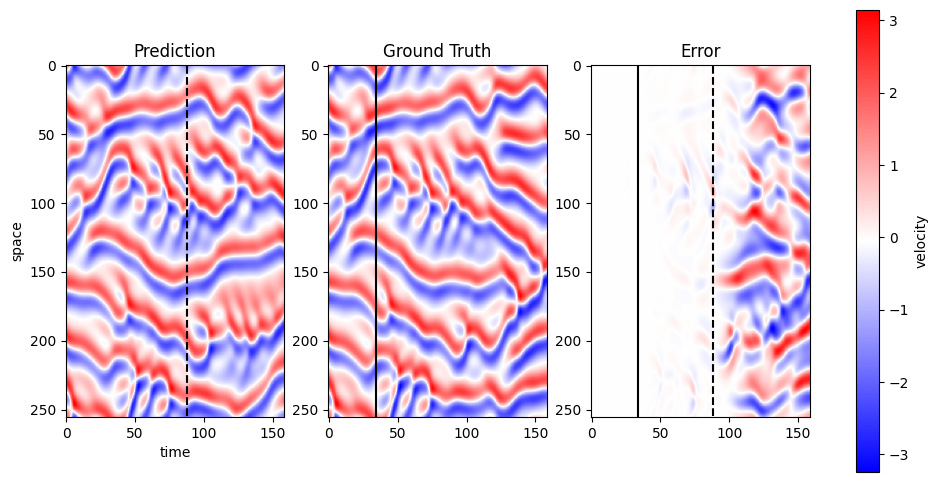

In [50]:
# Sample data (replace with your actual arrays)
data1 = prediction_baseline[30]  # First array
data2 = actual_baseline[30]  # Second array



# Create a figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 2 columns

# Plot data on each subplot
im = ax1.imshow(data1, cmap='bwr')  # Replace 'viridis' with your desired colormap
ax1.plot([88,88],[0,255], "k--")
ax1.set_title('Prediction')
ax1.set_xlabel('time')
ax1.set_ylabel('space')

ax2.imshow(data2, cmap='bwr')  # Replace 'plasma' with your desired colormap
ax2.plot([34,34,],(0,255), "k-")
ax2.set_title('Ground Truth')
#ax2.set_xlabel('X-axis')
#ax2.set_ylabel('Y-axis')

ax3.imshow(data2-data1, cmap='bwr')  # Replace 'plasma' with your desired colormap
ax3.plot([88,88],[0,255], "k--")
ax3.plot([34,34,],(0,255), "k-")
#ax3.plot([34,34,],(0,255), "k-")
ax3.set_title('Error')

# Get data limits (assuming your data is within [0, 1] range)
data_min = -3.0  # Replace with your minimum value
data_max = 3.0 # Replace with your maximum value

# Create a single colorbar
fig.colorbar(im, ax=[ax1, ax2, ax3], label='velocity')

# Adjust layout (optional)
#plt.tight_layout()

#fig.figure(figsize=(20, 8))
# Display the plot
plt.show()

In [91]:

import torch.nn as nn

class Normalizer_1D(nn.Module):
    """
    Normalizer class for data preprocessing.
    """

    def __init__(self, eps=1e-5):
        """
        Initializes the Normalizer class.

        Args:
            eps: A small value to avoid division by zero (default: 1e-5).
        """
        super(Normalizer_1D, self).__init__()
        # self.register_buffer("running_mean", torch.zeros(1))
        # self.register_buffer("running_std", torch.ones(1))

        self.running_mean = torch.zeros(1).to("cpu")
        self.running_std = torch.ones(1).to("cpu")
        self.eps = eps

    def forward(self, x):
        """
        Normalizes the input tensor by subtracting the mean and dividing by the standard deviation.

        Args:
            x: Input tensor.

        Returns:
            Normalized tensor.
        """
        B,D,I = x.shape
        print(x.shape)

        x_pool_dim = x.view(-1, x.shape[-1])

        # if not self.training:
        #     mean = self.running_mean
        #     std = self.running_std
        # else:
        #     # Calculate mean and variance during training
        #     x_pool_dim = x.view(-1, x.shape[-1])
        #     mean = torch.mean(x_pool_dim, dim=0)
        #     std = torch.std(x_pool_dim, dim=0)

        #     self.running_mean =  mean
        #     self.running_std =  std

        # Normalize the input
        #x_hat = (x_pool_dim - mean) / std

        self.running_mean =  x_pool_dim.mean(dim=0)
        self.running_std =  x_pool_dim.std(dim=0)
    
        x_hat = (x_pool_dim - x_pool_dim.mean(dim=0)) / x_pool_dim.std(dim=0)
        return x_hat.view(B,D,I)

    def inverse(self, x_hat):
        """
        Denormalizes the input tensor by reversing the normalization process.

        Args:
            x_hat: Normalized tensor.

        Returns:
            Unnormalized tensor.
        """
        mean = self.running_mean 
        std = self.running_std
        return x_hat * std + mean

normalizer = Normalizer_1D()


In [81]:
import numpy as np

In [98]:
dataset_train_path = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/KS1_train.h5"
dataset_test_path = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/KS1_test.h5"
dataset_valid_path ="/nobackup/scoc/variable_autoregression/dataset/data/KS1/KS1_test.h5"

n_train = 2048
n_test = 128

t_resolution_train = 140
t_resolution_test = 640
t_resolution_valid = 140
normalise_parameters  =True


hdf5_train_file = h5py.File(dataset_train_path, 'r')
hdf5_test_file = h5py.File(dataset_test_path, 'r')
hdf5_valid_file = h5py.File(dataset_valid_path, 'r')

L_min = 57.6
L_max = 70.40

dt_min = 0.18
dt_max = 0.22


train_loaded_data = hdf5_train_file['train']['pde_640-256'][:][:n_train, :t_resolution_train, :]
L_train = hdf5_train_file['train']['x'][:][:,-1][:n_train]
dt_train = hdf5_train_file["train"]["dt"][:][:n_train]


test_loaded_data = hdf5_test_file['test']['pde_640-256'][:][:n_test, :t_resolution_test, :]
L_test = hdf5_test_file['test']['x'][:][:,-1][:n_test]
dt_test = hdf5_test_file["test"]["dt"][:][:n_test]


valid_loaded_data = hdf5_valid_file['test']['pde_640-256'][:][-n_test:, :t_resolution_valid, :]
L_valid = hdf5_valid_file['test']['x'][:][:,-1][-n_test:]
dt_valid = hdf5_valid_file["test"]["dt"][:][-n_test:]


# if normalise_parameters:
#         L_train = (L_train - L_min)/(L_max - L_min)
#         dt_train = (dt_train - dt_min)/(dt_max - dt_min)

#         L_test = (L_test - L_min)/(L_max - L_min)
#         dt_test = (dt_test - dt_min)/(dt_max - dt_min)

#         L_valid = (L_valid - L_min)/(L_max - L_min)
#         dt_valid = (dt_valid - dt_min)/(dt_max - dt_min)





x_train = torch.from_numpy(train_loaded_data.squeeze()).float().permute(0,2,1)
L_train =  torch.from_numpy(L_train).float().unsqueeze(-1)
dt_train = torch.from_numpy(dt_train).float().unsqueeze(-1)

x_test = torch.from_numpy(test_loaded_data.squeeze()).float().permute(0,2,1)
L_test =  torch.from_numpy(L_test).float().unsqueeze(-1)
dt_test = torch.from_numpy(dt_test).float().unsqueeze(-1)

x_valid = torch.from_numpy(valid_loaded_data.squeeze()).float().permute(0,2,1)
L_valid =  torch.from_numpy(L_valid).float().unsqueeze(-1)
dt_valid = torch.from_numpy(dt_valid).float().unsqueeze(-1)

if normalise_parameters:
        L = torch.cat((L_train, L_test, L_valid), dim=0)
        L = normalizer(L.unsqueeze(-1)).squeeze(-1)

        L_train = L[:n_train]
        L_test = L[n_train:n_train+n_test]
        L_valid = L[n_train+n_test:]

        dt =torch.cat((dt_train,dt_test,dt_valid), dim=0)
        dt = normalizer(dt.unsqueeze(-1)).squeeze(-1)

        dt_train = dt[:n_train]
        dt_test = dt[n_train:n_train+n_test]
        dt_valid = dt[n_train+n_test:]


        # L_train = normalizer(L_train.unsqueeze(-1)).squeeze(-1)
        # dt_train = normalizer(dt_train.unsqueeze(-1)).squeeze(-1)

        # L_test = normalizer(L_test.unsqueeze(-1)).squeeze(-1)
        # dt_test = normalizer(dt_test.unsqueeze(-1)).squeeze(-1)

        # L_valid = normalizer(L_valid.unsqueeze(-1)).squeeze(-1)
        # dt_valid = normalizer(dt_valid.unsqueeze(-1)).squeeze(-1)


parameters_train_tensor = torch.zeros_like(x_train)
parameter_train = torch.cat((L_train, dt_train), dim=-1)
parameters_train_tensor[...,:parameter_train.shape[-1]] = parameter_train.unsqueeze(dim=1).repeat(1, x_train.shape[1], 1)



parameters_test_tensor = torch.zeros_like(x_test)
parameter_test = torch.cat((L_test, dt_test), dim=-1)
parameters_test_tensor[...,:parameter_test.shape[-1]] = parameter_test.unsqueeze(dim=1).repeat(1, x_test.shape[1], 1)



parameters_valid_tensor = torch.zeros_like(x_valid)
parameter_valid = torch.cat((L_valid, dt_valid), dim=-1)
parameters_valid_tensor[...,:parameter_valid.shape[-1]] = parameter_valid.unsqueeze(dim=1).repeat(1, x_valid.shape[1], 1)


torch.Size([2304, 1, 1])
torch.Size([2304, 1, 1])


In [97]:
L_train.shape

torch.Size([2048, 1])

In [86]:
np.expand_dims(L_train, axis=-1).shape

(2048, 1)

In [72]:
normalizer(parameters_valid_tensor)

torch.Size([128, 256, 140])

In [83]:
L_train.shape

(2048,)

In [80]:
parameters_train_tensor.shape

torch.Size([2048, 256, 140])

In [99]:
print(torch.max(L_train), torch.min(L_train), torch.mean(L_train), torch.std(L_train))

tensor(1.7013) tensor(-1.7410) tensor(-0.0082) tensor(1.0005)


In [95]:
print(torch.max(L_train), torch.min(L_train), torch.mean(L_train), torch.std(L_train))

tensor(1.7085) tensor(-1.7319) tensor(-6.0536e-08) tensor(1.)


In [77]:
print(torch.max(parameters_train_tensor), torch.min(parameters_train_tensor), torch.mean(parameters_train_tensor), torch.std(parameters_train_tensor))


tensor(1.0050) tensor(-0.0154) tensor(0.0070) tensor(0.0677)


In [48]:
hdf5_valid_file['test']['pde_640-256'][:].shape

(320, 640, 256)

In [44]:
parameter_train.shape

torch.Size([2048, 2])

In [45]:
parameters_train_tensor.shape

torch.Size([2048, 256, 140])

In [38]:
train_loaded_data.shape

(2048, 140, 256)

In [40]:
x_valid.shape

torch.Size([128, 256, 140])

In [39]:
parameters_valid_tensor.shape

torch.Size([128, 256, 140])

In [12]:
# Sample data (replace with your actual arrays)
data1 = prediction_norm_para[20]  # First array
data2 = actual_norm_para[20]  # Second array

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

# Plot data on each subplot
im = ax1.imshow(data1, cmap='jet')  # Replace 'viridis' with your desired colormap
ax1.set_title('Prediction')
ax1.set_xlabel('time')
ax1.set_ylabel('space')

ax2.imshow(data2, cmap='jet')  # Replace 'plasma' with your desired colormap
ax2.set_title('Ground Truth')
#ax2.set_xlabel('X-axis')
#ax2.set_ylabel('Y-axis')

# Get data limits (assuming your data is within [0, 1] range)
data_min = -3.0  # Replace with your minimum value
data_max = 3.0 # Replace with your maximum value

# Create a single colorbar
fig.colorbar(im, ax=[ax1, ax2], label='Colorbar', extend='both' )

# Adjust layout (optional)
#plt.tight_layout()

# Display the plot
plt.show()

NameError: name 'prediction_norm_para' is not defined

In [2]:
dataset_test_path = "/nobackup/scoc/variable_autoregression/dataset/data/KS1/KS_test_long.h5"
n_test = 5
#hdf5_train_file = h5py.File(args.dataset_train_path, 'r')
hdf5_test_file = h5py.File(dataset_test_path, 'r')
#hdf5_valid_file = h5py.File(args.dataset_valid_path, 'r')
print(hdf5_test_file['test'].keys())
#train_loaded_data = hdf5_train_file['train']['pde_250-100'][:]
test_loaded_data = hdf5_test_file['test']['pde_140-256'][:]
#valid_loaded_data = hdf5_valid_file['valid']['pde_250-100'][:]

#train_tensor =  train_loaded_data.squeeze()
#train_data = torch.from_numpy(train_tensor).float()

test_tensor =  test_loaded_data.squeeze()
test_data = torch.from_numpy(test_tensor).float()

#valid_tensor =  valid_loaded_data.squeeze()
#valid_data = torch.from_numpy(valid_tensor).float()


#x_train = train_data[:argsn_train,...].permute(0,2,1)
x_test = test_data[:n_test,...].permute(0,2,1)
#x_valid = valid_data[:args.n_test,...].permute(0,2,1)

<KeysViewHDF5 ['dt', 'dx', 'pde_640-256', 't', 'x']>


KeyError: "Unable to open object (object 'pde_140-256' doesn't exist)"